In [1]:
import numpy as np
import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random, os, pathlib

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def smooth_l1(x, beta=1):
    mask = x<beta
    y = torch.empty_like(x)
    y[mask] = 0.5*(x[mask]**2)/beta
    y[~mask] = torch.abs(x[~mask])-0.5*beta
    return y

def get_gp(cond):
    a=-20
    intolerables = F.softplus(cond-0.01, beta=-20)*5
#     intolerables = torch.clamp(F.softplus(cond-0.01, beta=-20), -1, 1)
#     intolerables = F.softplus(F.softplus(cond-0.1, beta=-20)+2, beta=10)-2
#     self.gp = (self.smooth_l1(intolerables*5)).mean()*self.lamda
    
    return intolerables
#     return smooth_l1(intolerables)
#     self.gp = (self.smooth_l1(intolerables*5)).mean()*self.lamda

def get_gs(cond):
    linear_mask = cond>0.14845
    a = 20.
    gclipper = -((1.05*(cond-1))**4)+1
    gclipper = torch.log(torch.exp(a*gclipper)+1)/a
    gc2 = 3*cond-0.0844560006
    gclipper[linear_mask] = gc2[linear_mask]
    return gclipper

def get_gs2(cond):
    linear_mask = cond>0.08497
    a = 20.
    gclipper = -((1.05*(cond-1))**4)+1
    gclipper = torch.log(torch.exp(a*gclipper)+1)/a
    gc2 = 20.833544724 * (x**2)
    gclipper[linear_mask] = gc2[linear_mask]
    return gclipper

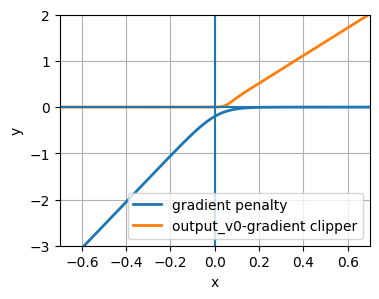

In [3]:
x = torch.linspace(-1.3, 0.7, 200)

gp = get_gp(x)
gs = get_gs(x)

%matplotlib inline
# plt.axis('equal')
plt.figure(figsize=(4,3))
plt.plot(x, gp, lw=2, label='gradient penalty')
plt.plot(x, gs, lw=2, label='output_v0-gradient clipper')
plt.hlines(0, -2, 2)
plt.vlines(0, -5, 2)
plt.xlim(-0.7, 0.7)
plt.ylim(-3, 2)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-0.5, 0.5)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

plt.savefig("./invex_out/gc_gp.pdf", bbox_inches='tight')

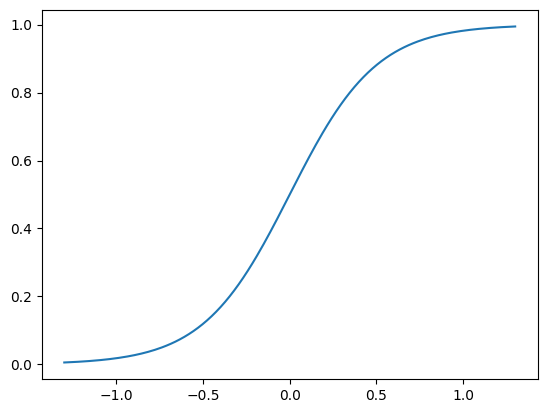

In [5]:
x = torch.linspace(-1.3, 1.3, 200)
plt.plot(x, F.sigmoid(4*x))